# Unsupervised Algorithms in Machine Learning Final Project


# Introduction and Problem Identification
**Gather data, determine the method of data collection and provenance of the data (3 points)**

This is my final project of the Unsupervised Algorithms in Machine Learning from Coursera's Masters Degree in Data Science. The objective is to identify an Unsupervised Learning problem to perform Exploratory Data Analysis (EDA) and model analysis. 

The dataset I will use for this work is called "Automobile Customer" and is coming from [Kaggle](https://www.kaggle.com/datasets/akashdeepkuila/automobile-customer). As described on Kaggle's website,the dataset provides the details of existing and potential customers of the company based on the purchase history and the corresponding segments they have been classified into. In this case, the data is related with an automobile company that has plans to enter into new markets with their existing products called *P1, P2, P3, P4 and P5.* The market research team has information that the new market would have a similar behavior than the existing one, where the sales team has already classified all the customers into 4 groups : *A, B, C and D.* Having this categorization done, they can perform specialized comunication for each of the different groups which has given them excellent results. The team has identified 2,627 new potential customers and the plan is to follow the same outreach and communication strategy applied in the existing markets. 

Considering the nature of the dataset, I would like to apply the unsupervised learning model of clustering by **K-means and PCA** as this is a problem of customer segmentation. Nowadays, companies of every industry have in mind that every customer is different and therefore their marketing strategy should be specific for each customer in order to have more effect. In addition, they also know that if they are able to have a better and deeper understanding of the customer's needs they will be able to improve their marketing strategies for each segment.Therefore, the companies are grouping customers that are similar in gender, age, interests, etc creating segments (that's why it is called Customer Segmentation).

At the end of the Model's Analysis section, I will compare the main model with DBSCAN and Random Forest Classifier in order to understand what model is best suitable for the dataset chosen.

My purpose with this project is to demonstrate the power that clustering has and learn how the unsupervised learning model's performance can be improved. 



In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
from numpy.random import RandomState
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import mode

/kaggle/input/automobile-customer/test-set.csv
/kaggle/input/automobile-customer/train-set.csv


In [158]:
df = pd.read_csv('../input/automobile-customer/train-set.csv', header = 0)
df.head()


,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


# Exploratory Data Analysis (EDA) - Inspection, Visualization, and Data Cleaning

Based on Kaggle's website, the dataset should contain 11 columns called: CustomerID, Gender, Married, Age, Graduated, Profession, Work Experience (in years), Spending Score, Family Size (including the customer), Category and Segmentation (target variable).  Through the following line of code I will confirm the data types of each column and if there are any NaN values. 

In [115]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


As shown in th summary, we see the 11 columns with 8,068 entries. Columns "Married", "Graduated", "Profession", "WorkExperience", "FamilySize" and "Category" have missing data which needs to be fixed in order to have a succesful customer segmentation. The following line will show how many missing values are contained in each column:




In [116]:
print('Missing values:\n', df.isna().sum())


Missing values:
 CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64


I'll create a new dataframe filling the missing values of the columns mentioned above with zeros: 

In [159]:
new_df=df.fillna(0)

In [118]:
#printing again the new dataframe to confirm there are no missing values anymore
print('Missing values:\n', new_df.isna().sum())

Missing values:
 CustomerID        0
Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
Category          0
Segmentation      0
dtype: int64


Next, in order to understand data distribution, I'll create the following plots for numerical features (Age, Work Experience and Family Size). Starting with age, we can see that most customers are between 30 and 50 years old, considering some outliers above 70.

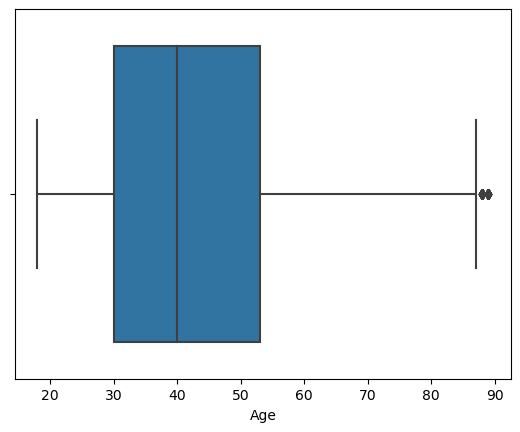

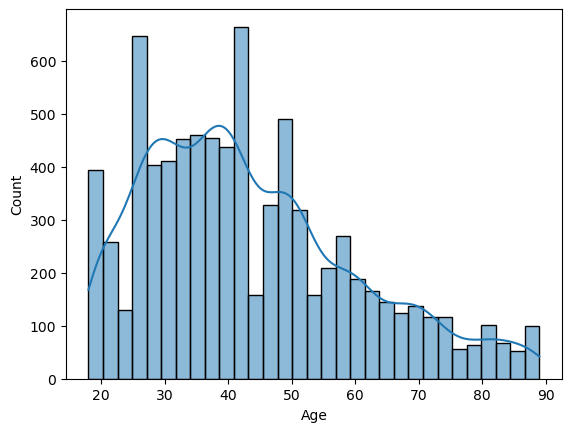

In [119]:
sns.boxplot(x='Age', data=new_df)
plt.show()

sns.histplot(x='Age', data=new_df, kde=True)
plt.show()

Now, going with Work Experience, most customers have work experience between 0 and 10 years, with outliers observed above 10.

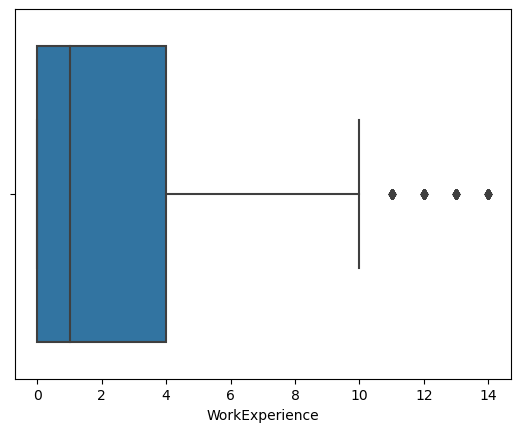

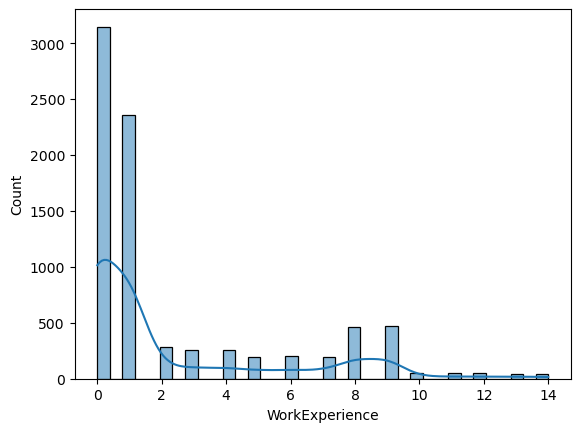

In [120]:
sns.boxplot(x='WorkExperience', data=new_df)
plt.show()

sns.histplot(x='WorkExperience', data=new_df, kde=True)
plt.show()

Lastly, I'll analyze Family Size. This feature shows most customers with 2-3 family members, having almost a symmetric behavior and showing outliers above 7.

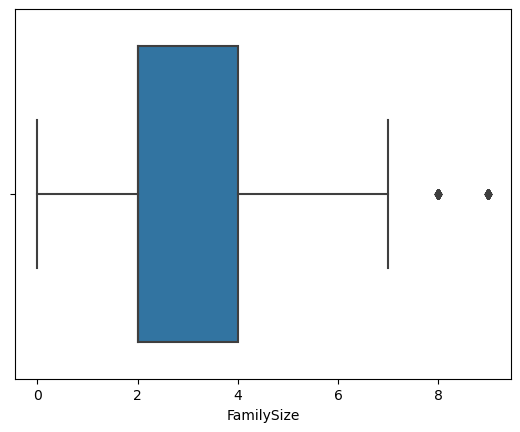

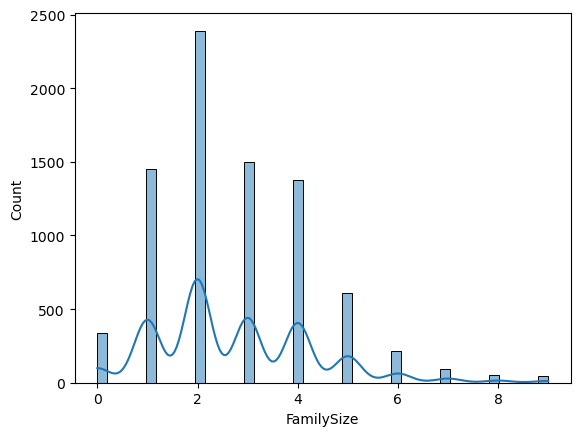

In [121]:
sns.boxplot(x='FamilySize', data=new_df)
plt.show()

sns.histplot(x='FamilySize', data=new_df, kde=True)
plt.show()

Now, I'll proceed to take a closer look to categorical features giving a brief summary after the plots: 

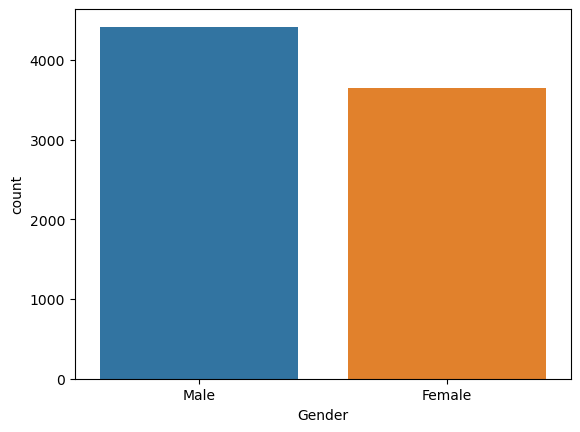

In [122]:
sns.countplot(x='Gender', data=new_df)
plt.show()

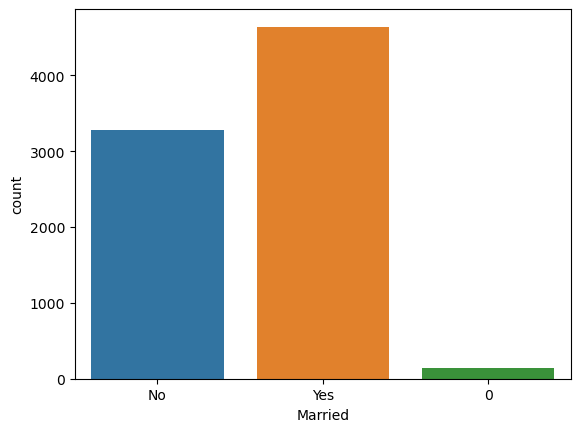

In [123]:
sns.countplot(x='Married', data=new_df)
plt.show()

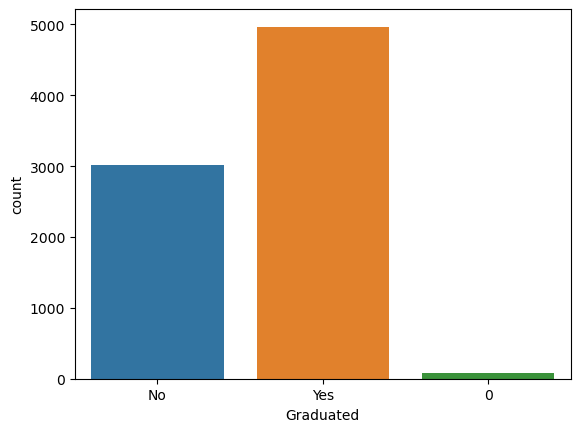

In [124]:
sns.countplot(x='Graduated', data=new_df)
plt.show()

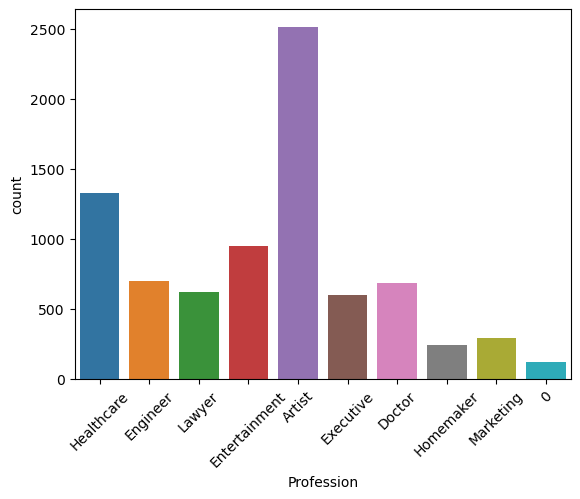

In [125]:
sns.countplot(x='Profession', data=new_df)
plt.xticks(rotation=45)
plt.show()

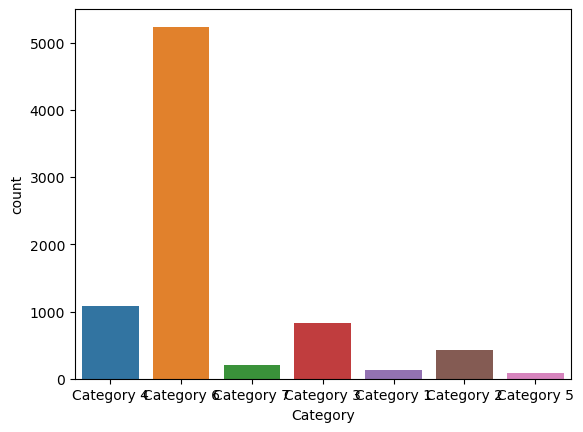

            Category
Category 6      5238
Category 4      1089
Category 3       822
Category 2       422
Category 7       203
Category 1       133
Category 5        85


In [148]:
sns.countplot(x='Category', data=new_df)
plt.show()

counts_per_cat = pd.DataFrame(new_df['Category'].value_counts())
print(counts_per_cat)

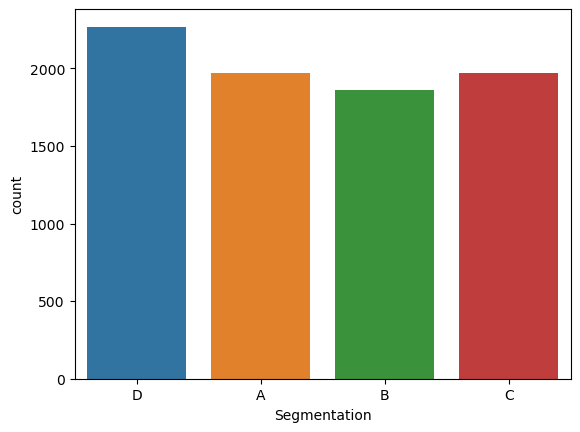

In [127]:
sns.countplot(x='Segmentation', data=new_df)
plt.show()

The plots show that:
* Slightly more male than female
* Most customers are married and graduates
* The most common professions are artists and healthcare professionals
* Most customers are within Category 6
* Segments are almost equally distributed

Now, I'll study the correlation within the numerical features:

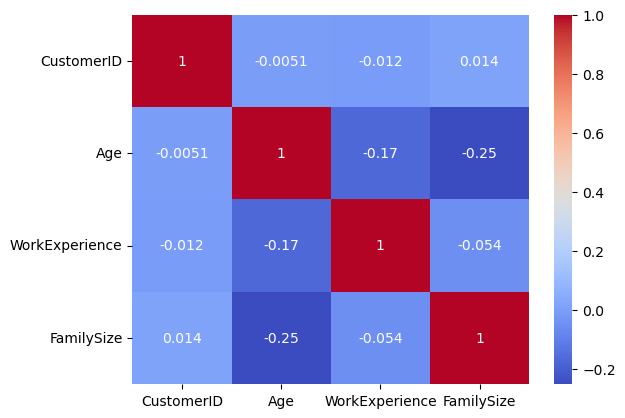

In [128]:
#new_df = new_df.drop('CustomerID', axis=1)

sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap does not show any correlation between any of these numeric features as they are all negatives.  In addition, considering the distribution plots, we can say that they are normally distributed and therefore, no data transformation is needed. The dataset is made of mostly categorigal features which works fine for the clustering model, we just need to turn them into binary values.

The only features that I need to drop are "CustomerID" and "Category" as they won't contribute to the clustering model:

In [129]:
new_df=new_df.drop(columns=['CustomerID','Category'])
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8068 non-null   object 
 1   Married         8068 non-null   object 
 2   Age             8068 non-null   int64  
 3   Graduated       8068 non-null   object 
 4   Profession      8068 non-null   object 
 5   WorkExperience  8068 non-null   float64
 6   SpendingScore   8068 non-null   object 
 7   FamilySize      8068 non-null   float64
 8   Segmentation    8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [130]:
new_df.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A


# Model Creation

After doing the EDA, I proceed to create the unsupervised learning model  but before that, I'll do a pre-processing on the categorical features through a one-hot encoding so I can reduce the data's dimensionality through Principal Component Analysis (PCA) and then build the KMeans model. The "get_dummies" function will convert these categorical features into binary variables, having now columns with numerical values only.

**Main Model : PCA with 2 components and 4 clusters**

In [131]:
new_df = pd.get_dummies(new_df, columns=['Gender', 'Married', 'Graduated', 'Profession','SpendingScore', 'Segmentation'], drop_first=True)
new_df.head()

,Age,WorkExperience,FamilySize,Gender_Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,...,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,SpendingScore_High,SpendingScore_Low,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,4.0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,38,0.0,3.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,1.0,1.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,67,0.0,2.0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4,40,0.0,6.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


Now that we have our dataset full of numerical values, I'll do a feature scaling through the sklearn's StandardScaler library. The feature scaling is a standardization of the feature's range and this is needed because of the model's sensitivity. In other words, each feature will have the same scale with their distribution centered around zero. 

In [132]:
cat_scaler=StandardScaler()
dataframe_scaled=cat_scaler.fit_transform(new_df)
dataframe_scaled

array([[-1.28462344, -0.41210249,  0.79096407, ..., -0.54698706,
        -0.56838081,  1.59916204],
       [-0.32715082, -0.71285715,  0.16728364, ..., -0.54698706,
        -0.56838081, -0.6253275 ],
       [ 1.40826831, -0.41210249, -1.08007721, ...,  1.8281968 ,
        -0.56838081, -0.6253275 ],
       ...,
       [-0.62636101, -0.41210249, -1.08007721, ..., -0.54698706,
        -0.56838081,  1.59916204],
       [-0.98541324, -0.41210249,  0.79096407, ...,  1.8281968 ,
        -0.56838081, -0.6253275 ],
       [-0.38699286, -0.71285715,  0.16728364, ...,  1.8281968 ,
        -0.56838081, -0.6253275 ]])

With the dataset scaled, the next step is to perform a Principal Component Analysis (PCA) to reduce the dimensionality of the data. I put 2 components in order to have the data in a 2D scatter plot. 

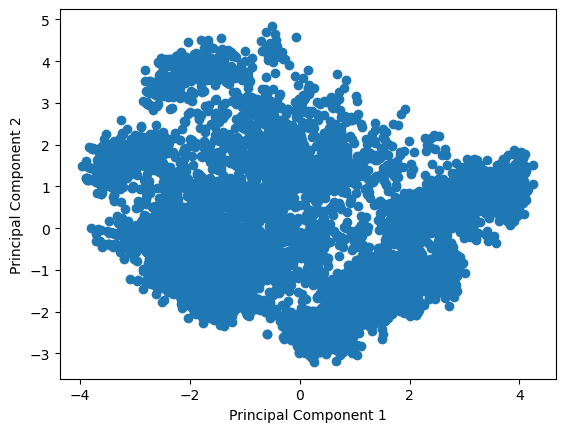

In [133]:
pca=PCA(n_components=2)
dataframe_PCA=pca.fit_transform(dataframe_scaled)

# Creation of Scatter Plot
plt.scatter(dataframe_PCA[:,0], dataframe_PCA[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Once the dataset's dimensionality has been reduced, I can use the data to build the model. The first step is to determine the number of clusters and I'll use the "Elbow Method" to determine the optimal number. The way the following code works is that it loops through a range of 1 to 10 clusters (just as a starting point but this could be changed as needed to get different results) to fit a KMeans model. Then, the "inertia" attribute will be appended to the list of sum squares. This "sum of squares" variable represent the sum of the squared distances of samples or data to their closest cluster center. For each run, this value will get minimized giving the optimized number of clusters. This procedure is called "Within-Cluster Sum of Squares" (WCSS) and through the "Elbow" plot, we can see the point where adding more clusters won't improve significantly the WSS. In this case, we can see that the "elbow point" is 4. 

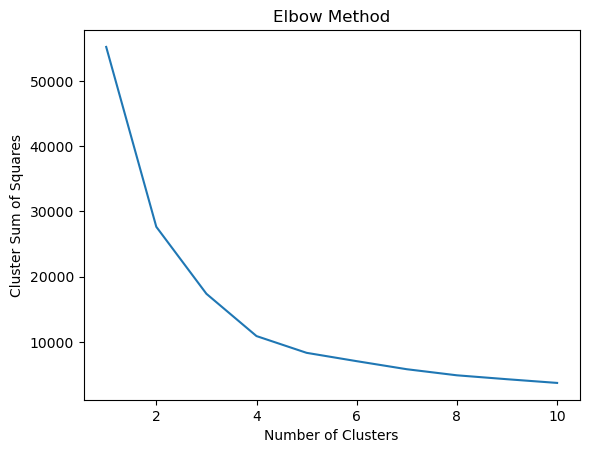

In [134]:
list_sum_squares = []
for c in range(1, 11):
    kmeans = KMeans(n_clusters=c, init='k-means++', random_state=42)
    kmeans.fit(dataframe_PCA)
    list_sum_squares.append(kmeans.inertia_)
plt.plot(range(1, 11), list_sum_squares)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Sum of Squares')
plt.show()

With the optimal number of clusters defined (4) ,I'll create the main model of this project. The KMeans' parameter is set up to "kmeans++" to initialize the centroids. 

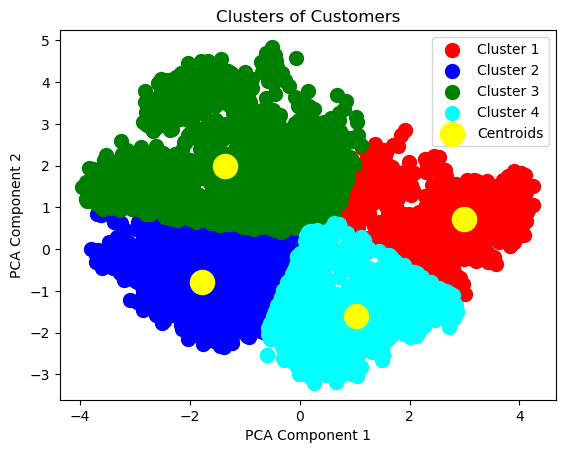

In [135]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
main_kmeans = kmeans.fit_predict(dataframe_PCA)

#Creation of Scatter Plot to visualize the Clusters"
plt.scatter(dataframe_PCA[main_kmeans == 0, 0], dataframe_PCA[main_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataframe_PCA[main_kmeans == 1, 0], dataframe_PCA[main_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataframe_PCA[main_kmeans == 2, 0], dataframe_PCA[main_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataframe_PCA[main_kmeans == 3, 0], dataframe_PCA[main_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



The previous plot gives us a visual idea of the cluster's data distribution. In order to complete the model's analysis, I would like to include the cluster label information into the original dataset and generate a histogram to know which cluster has the majority of the customers.

In [136]:
labels_cluster=kmeans.labels_

dataframe_labels = pd.DataFrame({'Cluster Label': labels_cluster})
new_df=df
final_dataframe=pd.concat([new_df,dataframe_labels],axis=1)
#Adding 1 to the Cluster Label column so the numbering starts from 1 instead of 0 to match the plot previously shown
final_dataframe['Cluster Label']=final_dataframe['Cluster Label']+1
final_dataframe.head(10)



,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation,Cluster Label
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B,3
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A,3
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Category 6,C,3
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Category 6,C,4
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Category 6,D,4
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Category 7,D,2
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Category 6,C,2


   Cluster Label  Count
0              2   2625
1              3   1846
2              4   1805
3              1   1792


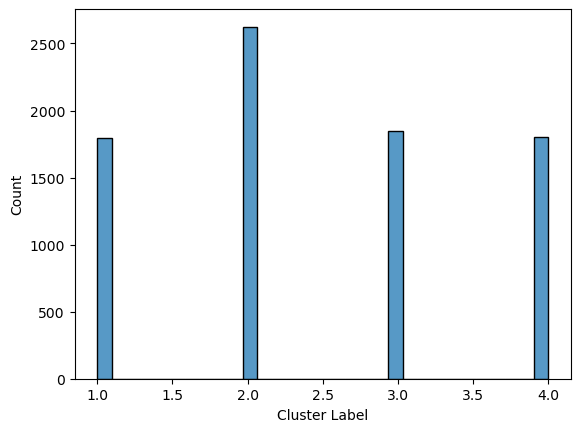

In [137]:
counts_per_cluster = pd.DataFrame(final_dataframe['Cluster Label'].value_counts())
counts_per_cluster.reset_index(inplace=True)
counts_per_cluster.columns = ['Cluster Label', 'Count']
print(counts_per_cluster)

sns.histplot(x='Cluster Label', data=final_dataframe)
plt.show()

The cluster with more customers is "Cluster # 2" with 2,625 followed by 3 and 4 with almost an even distribution (1,800).

**Comparison with other Models : (DBSCAN and Random Forest Trees)**

First, I'll compare the KMeans main model with another unsupervised learning technique: DBSCAN (which stands for "Density-based spatial clustering of applications with noise). KMeans gets very affected if there's a minor change in the data points as the clusters depend on the mean value of its elements, DBSCAN has a more robust performance against this and it does not need us to specify the number of clusters in comparison with KMeans. The only thing needed is to use a function to calculate the distance between the values and define how much close do we want the data to be. 

In [138]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(dataframe_scaled)

number_clusters = len(set(dbscan_labels))
if -1 in dbscan_labels:
    number_clusters = number_clusters -1
print("Number of clusters from DBSCAN: ", number_clusters)

#setting an offset 1 so the numbering of the clusters starts from 1 instead of 0
dbscan_labels = dbscan_labels + 1
dbscan_cluster_count = dict(Counter(dbscan_labels))
print("Number of customers in each DBSCAN cluster: ", dbscan_cluster_count)

Number of clusters from DBSCAN:  35
Number of customers in each DBSCAN cluster:  {1: 50, 0: 7299, 10: 16, 2: 26, 3: 32, 4: 51, 5: 62, 6: 33, 7: 19, 8: 24, 9: 16, 11: 13, 12: 14, 13: 13, 14: 20, 15: 37, 16: 26, 17: 33, 18: 22, 19: 20, 34: 10, 20: 17, 30: 14, 21: 18, 32: 12, 22: 13, 23: 16, 24: 16, 26: 15, 25: 44, 31: 10, 27: 13, 28: 11, 29: 14, 35: 10, 33: 9}


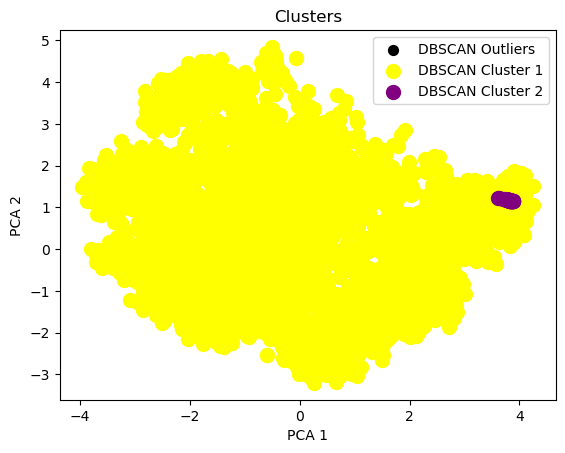

In [139]:
plt.scatter(dataframe_PCA[dbscan_labels == -1, 0], dataframe_PCA[dbscan_labels == -1, 1], s = 50, c = 'black', label = 'DBSCAN Outliers')
plt.scatter(dataframe_PCA[dbscan_labels == 0, 0], dataframe_PCA[dbscan_labels == 0, 1], s = 100, c = 'yellow', label = 'DBSCAN Cluster 1')
plt.scatter(dataframe_PCA[dbscan_labels == 1, 0], dataframe_PCA[dbscan_labels == 1, 1], s = 100, c = 'purple', label = 'DBSCAN Cluster 2')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [140]:
print("Silhouette score for DBSCAN: ", silhouette_score(dataframe_scaled, dbscan_labels))

Silhouette score for DBSCAN:  -0.31243066873889724


The silhouette score measures how similar an object is to its own cluster in comparison to other clusters, going from -1 to 1. A score of -1 as shown in the previous cell, indicates that the object is poorly matched with its own cluster and well matched to the neighboring clusters. It could also mean the there could be some overlapping between the points and that can be observed through the scatter plot shown above.

In [141]:
print("Silhouette score for KMeans: ", silhouette_score(dataframe_PCA, labels_cluster))

Silhouette score for KMeans:  0.48627850632387504


Now, I'll play with the DBSCAN hyperparameters to see if we can improve its silhouette score. I'll from 0.3 to 5 in epsilon and from 10 to 50 in min_samples:

In [143]:
dbscan2 = DBSCAN(eps=5, min_samples=50)
dbscan_labels_2 = dbscan2.fit_predict(dataframe_scaled)

number_clusters_2 = len(set(dbscan_labels_2))
if -1 in dbscan_labels_2:
    number_clusters_2 = number_clusters_2 -1
print("Number of clusters from DBSCAN: ", number_clusters_2)

print("Silhouette score for DBSCAN with updated epsilon and min_samples: ", silhouette_score(dataframe_scaled, dbscan_labels_2))

Number of clusters from DBSCAN:  3
Silhouette score for DBSCAN with updated epsilon and min_samples:  0.23015687071364882


Number of customers in each DBSCAN_2 cluster:  {1: 7530, 2: 246, 3: 292}


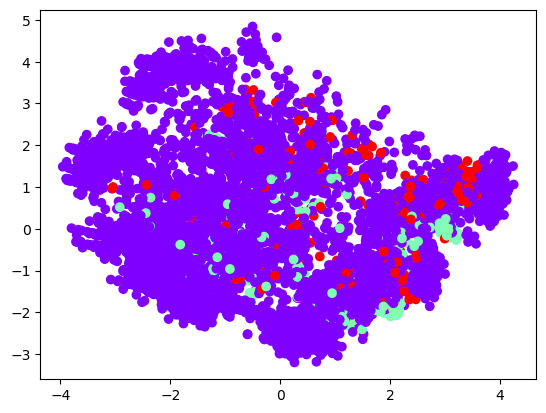

In [144]:
plt.scatter(dataframe_PCA[:,0], dataframe_PCA[:,1], c=dbscan_labels_2, cmap='rainbow')

dbscan_labels_2 = dbscan_labels_2 + 1

dbscan_cluster_count_2 = dict(Counter(dbscan_labels_2))
print("Number of customers in each DBSCAN_2 cluster: ", dbscan_cluster_count_2)

Finally, I would like to use a Supervised Learning model to compare it against the KMeans model expecting to have a better performance as the data is already labeled. I'm going to use Random Forest Tree as it is an algorithm that can be used not only to do regressions but also to perform classification. The idea is to use RFT to predict the segment for new potential customers based on the features studied in the previous sections. 

In [160]:
df_RFC=new_df
df_RFC= pd.get_dummies(df_RFC, columns=['Gender', 'Married', 'Graduated', 'Profession','Category','SpendingScore'], drop_first=True)
X=df_RFC.drop('Segmentation',axis=1)
y=df_RFC['Segmentation']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4969021065675341


# Conclusions

From the results shown in the previous section, it was demonstrated that the supervised learning model (in this case the Random Forest Tree) had the best performance between the 2 unsupervised learning models (KMeans and DBSCAN). This makes sense because the dataset had already a target variable ("Segmentation") and under this situation, the supervised learning models are more suitable than the unsupervised learning models. The Random Forest Tree had an accuracy of 0.49. slightly higher than the KMeans where we obtained 0.48.

On the other hand, when comparing the two unsupervised learning models with each other, KMeans, with a silhouette accuracy of 0.48, performed better than DBSCAN, with a silhouette accuracy of 0.23 obtained in the second run after optimizing its hyperparameters (the first run got an accuracy of -0.321). With the second run. I understood the impact that the "epsilon" and the "min_samples" have on the model's performance. Firs of all, the first model gave me 33 clusters whereas on the second run I obtained 3 (lookin more llike the KMeans cluster); and the silhouette score turned positive getting closer to the KMeans accuracy.

Based on the previous results and also with some of the information I read at the moment of developing this project, I can summarize the strengths and weaknesses of both models as follow:
* KMeans normally is faster (and more efficient) than DBSCAN
* KMeans works better when the clusters have a spherical shape. On the other hand, DBSCAN is more flexible and can identify clusters with arbitrary shape
* KMeans need a number of clusters as an input whereas DBSCAN doesn't. If this isn't known beforehand, it could be a problem.
* DBSCAN can handle noise better that KMeans* 

Furthermore, and this applies to supervised and unsupervised models, the performance depends heavily on the most optimal choice of hyperparameters (as demonstrated through the second run of the DBSCAN model). Also, the performance can also be improved through the preprocessing of data. For example, one recommendation when using clustering is that the missing values get filled with the average value of the cluster that the customer is in, leading to more accurate data affecting positively the model's performance. In this project, I filled the missing values with zeroes.

In conclusion, I enojoyed working in this project as it allowed me to apply the knowledge learned through the course and also the one I obtained from the previous class (Supervised Learning Algorithms). I would like to keep working with this dataset but now using Agglomerative Clustering from the unsupervised models and Neural Networks from the supervised side.

The code of this project can also be found at Github with the following link: https://github.com/capi5757/Unsupervised-Algorithms-Final-Project

# References
* T, Fazil. *Popular Unsupervised Clustering Algorithms*. Kaggle, https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms. 2019
* Kashnitsky,Y. *Topic 7. Unsupervised Learning: PCA and Clustering*. Kaggle,https://www.kaggle.com/code/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering. 2019
* Kar, S. *Customer Segmentation | EDA, Clustering, KMeans*. Kaggle,https://www.kaggle.com/code/sonerkar/customer-segmentation-eda-clustering-kmeans. 2021 
* Gutierrez,D. *Unsupervised Learning: Evaluating Clusters*. ODSC. https://opendatascience.com/unsupervised-learning-evaluating-clusters/. November 23,2018.
* Chauhan, N. *DBSCAN Clustering Algorithm in Machine Learning*. KDNuggets. https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html. April 4, 2022.